## Time Series analysis

A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals.  The data is considered in three types:

Time series data: A set of observations on the values that a variable takes at different times.

Cross-sectional data: Data of one or more variables, collected at the same point in time.

Pooled data: A combination of time series data and cross-sectional data.

Terms and concepts:

Dependence: Dependence refers to the association of two observations with the same variable, at prior time points.

Stationarity: Shows the mean value of the series that remains constant over a time period; if past effects accumulate and the values increase toward infinity, then stationarity is not met.

Differencing: Used to make the series stationary, to De-trend, and to control the auto-correlations; however, some time series analyses do not require differencing and over-differenced series can produce inaccurate estimates.

Specification: May involve the testing of the linear or non-linear relationships of dependent variables by using models such as ARIMA, ARCH, GARCH, VAR, Co-integration, etc.

Exponential smoothing in time series analysis: This method predicts the one next period value based on the past and current value.  It involves averaging of data such that the nonsystematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term predication.  Alpha, Gamma, Phi, and Delta are the parameters that estimate the effect of the time series data.  Alpha is used when seasonality is not present in data.  Gamma is used when a series has a trend in data.  Delta is used when seasonality cycles are present in data.  A model is applied according to the pattern of the data.  Curve fitting in time series analysis: Curve fitting regression is used when data is in a non-linear relationship. The following equation shows the non-linear behavior:

Dependent variable, where case is the sequential case number.

Curve fitting can be performed by selecting “regression” from the analysis menu and then selecting “curve estimation” from the regression option. Then select “wanted curve linear,” “power,” “quadratic,” “cubic,” “inverse,” “logistic,” “exponential,” or “other.”


## Health Information Brazil
**Epidemiologicas and morbidity**
 Focus in a dataset about **Tuberculosis cases** extract from the TABNET 
 
 The data is related to the year/ month of the illness was diagnosticated in Brazil.


Font: http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/tubercbr.def

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

Read the file and show the information

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

tube = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=17, engine="python")
tube.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
tube.drop('Total', axis=1, inplace=True)
tube.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


### Challenge 1:
Transforme the data in a time series year-month using melt function from pandas, after rename the colunms.


In [4]:
tube_ts = tube.melt(id_vars = 'Ano Diagnóstico', value_name= 'Cases', var_name='Month')
tube_ts['Date'] = tube_ts['Ano Diagnóstico'].apply(str) + "-" + tube_ts['Month']

tube_ts

,Ano Diagnóstico,Month,Cases,Date
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


### Challenge 2:
Convert the column Date (string) to Datetime

In [5]:
dict =  {"Jan":"1","Fev":"2","Mar":"3","Abr":"4","Mai":"5","Jun":"6",
         "Jul":"7","Ago":"8","Set":"9",
         "Out":"10","Nov":"11","Dez":"12"}

new_date = []
for i  in tube_ts["Date"]:
  value = i.replace("-", " ")
  x = value.split()[1].replace(value.split()[1],dict[value.split()[1]])
  new_date.append(str(value.split()[0] +"-" +  x))

In [6]:
tube_ts['Date'] = new_date
tube_ts.head(5)

,Ano Diagnóstico,Month,Cases,Date
0,2001,Jan,8088,2001-1
1,2002,Jan,8013,2002-1
2,2003,Jan,8115,2003-1
3,2004,Jan,7574,2004-1
4,2005,Jan,7432,2005-1


In [7]:
tube_ts['Date'] = pd.to_datetime(tube_ts['Date'])
tube_ts['Date'].dt.strftime('%Y-%m')
tube_ts

,Ano Diagnóstico,Month,Cases,Date
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dez,6844,2015-12-01
224,2016,Dez,6672,2016-12-01
225,2017,Dez,7020,2017-12-01
226,2018,Dez,6900,2018-12-01


Reorganize the dataframe and keep only the columns that are relevant for the analysis of Time series

In [10]:
tube_ts = tube_ts[['Date', 'Cases']]
tube_ts

,Date,Cases
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


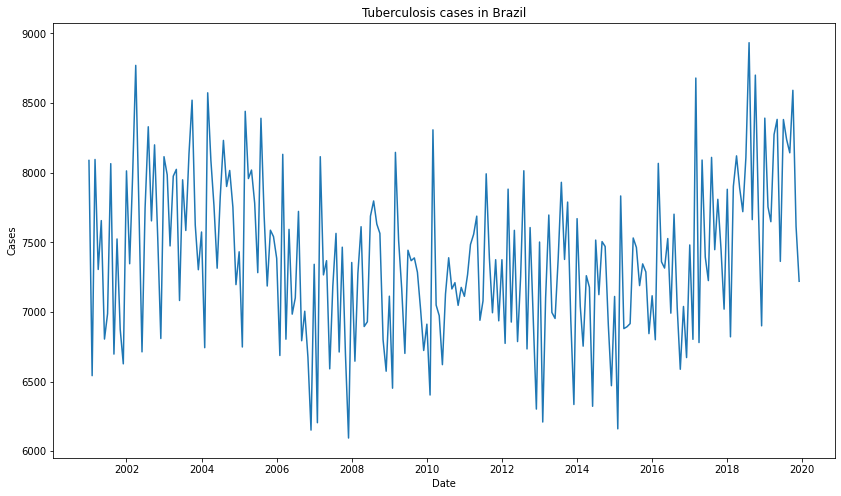

In [12]:
plt.figure(figsize=(14,8))
ax = sns.lineplot(x= 'Date', y='Cases', data=tube_ts)
plt.title('Tuberculosis cases in Brazil');

### Challenge 3:
Search for other dataset and work to transform in a time series.

I choose the dataset from Datasus related to LEPROSY cases contact diagnostics in Brazil.

## Leprosy

#### Introduction
Leprosy is a chronic condition with high potential for causing disability and stigma perpetuating the vicious circle of poverty. A significant decrease of incidence rates after introduction of the multidrug therapy can be observed, but the disease is still a cause of morbidity, especially in vulnerable populations. In addition, the impact on mortality patterns from direct or indirect causes related to the disease is present, especially in the male population.

Leprosy cases are not distributed homogeneously in Brazil, with areas of higher risk mainly located in the Midwest, North, and Northeast regions. The ten clusters with the highest risk of occurrence of new cases (NC) are located mainly in the states of Mato Grosso, Pará, Maranhão, Tocantins, Goiás, Rondônia, and Bahia; together, they account for 44% of all cases diagnosed in 2013. In 2014, the state of Bahia ranked thirteenth in the national ranking of new case detection rates with 17.4 new leprosy cases per 100,000 inhabitants, higher than the Brazilian average (15.3 cases per 100,000 inhabitants).

In [13]:
leprosy = pd.read_csv('tuberculosis_year_month_diagnosy.csv',encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=10 )
leprosy.head()

<ipython-input-13-9dc8616dcd94>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  leprosy = pd.read_csv('tuberculosis_year_month_diagnosy.csv',encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=10 )


FileNotFoundError: [Errno 2] No such file or directory: 'tuberculosis_year_month_diagnosy.csv'

In [ ]:
dados_st['Data'] = pd.todatetime(dados_st['data'], format='%Y-%B')
dados_st['Data'] = dados_st['Ano Diagnóstico'].astype(str)+ '-'+dados_st['Mês']